
# IE 555 - Atharva Bhope

## Import station status data and station information data from the JSON file and provide real time records of the data. 
## Create Dataframes to store the current current station status and station information.

In [203]:
import requests
import pandas as pd

url1 = 'https://gbfs.lyft.com/gbfs/2.3/bkn/es/station_status.json'
response = requests.get(url1)
response.raise_for_status()
data = response.json()

stations_stat = data["data"]["stations"]
df_stations_stat = pd.DataFrame(stations_stat)

df_stations_stat.head()

,num_docks_disabled,num_bikes_available,is_renting,is_returning,num_bikes_disabled,last_reported,is_installed,vehicle_types_available,num_docks_available,num_ebikes_available,station_id,num_scooters_available,num_scooters_unavailable
0,0,0,0,0,0,86400,0,"[{'vehicle_type_id': '1', 'count': 0}, {'vehic...",0,0,1905837242740508940,NaN,NaN
1,0,0,0,0,0,1756815971,0,"[{'vehicle_type_id': '1', 'count': 0}, {'vehic...",0,0,a47f77a2-9008-4652-a4f1-b95eee723a1b,NaN,NaN
2,0,0,0,0,0,1759761514,0,"[{'vehicle_type_id': '1', 'count': 0}, {'vehic...",0,0,498d7e8e-5164-4f26-9ce6-399947d73b1a,NaN,NaN
3,0,0,0,0,0,86400,0,"[{'vehicle_type_id': '1', 'count': 0}, {'vehic...",0,0,66db3687-0aca-11e7-82f6-3863bb44ef7c,NaN,NaN
4,0,0,0,0,0,1763045510,0,"[{'vehicle_type_id': '1', 'count': 0}, {'vehic...",0,0,66dc7ba2-0aca-11e7-82f6-3863bb44ef7c,NaN,NaN


In [204]:
import requests
import pandas as pd

url2 = 'https://gbfs.lyft.com/gbfs/2.3/bkn/es/station_information.json'
response = requests.get(url2)
response.raise_for_status()
data = response.json()

stations_info = data["data"]["stations"]
df_stations_info = pd.DataFrame(stations_info)

df_stations_info.head()

,rental_uris,lat,name,capacity,lon,region_id,station_id,short_name
0,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.729387,E 14 St & Ave B,43,-73.977724,71,66dc7ba2-0aca-11e7-82f6-3863bb44ef7c,5736.09
1,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.700379,Columbia Heights & Cranberry St,37,-73.995481,71,66db3687-0aca-11e7-82f6-3863bb44ef7c,4829.01
2,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.706360,Suydam St & St Nicholas Ave,17,-73.919450,71,498d7e8e-5164-4f26-9ce6-399947d73b1a,5043.06
3,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.762110,31 St & Broadway,35,-73.925230,71,1905837242740508940,6789.20
4,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.754692,W 35 St & Dyer Ave,41,-73.997402,71,a47f77a2-9008-4652-a4f1-b95eee723a1b,6569.08


The output shows the required Dataframe containing the station information and station status data. 

## Merge the two dataframes based on a common identifier, and visualize the number of bikes available

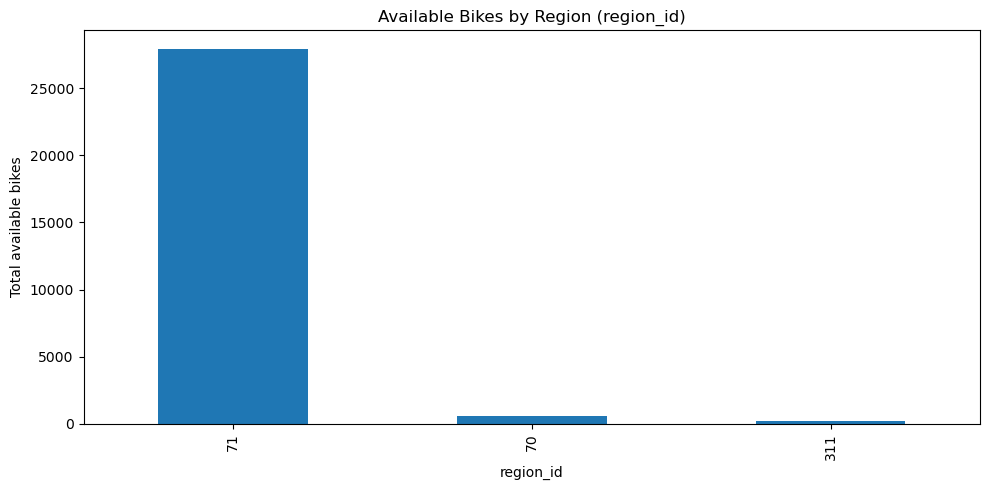

In [205]:
merged_df = pd.merge(df_stations_stat, df_stations_info, on='station_id', how='inner')
merged_df_clean = merged_df.dropna()
bikes_by_region = (merged_df_clean.groupby('region_id')['num_bikes_available'].sum().sort_values(ascending=False))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
bikes_by_region.plot(kind="bar")
plt.title("Available Bikes by Region (region_id)")
plt.xlabel("region_id")
plt.ylabel("Total available bikes")
plt.tight_layout()
plt.show()

In [206]:
merged_df_clean[['num_bikes_available', 'name']].head()

,num_bikes_available,name
9,2,83 St & Narrows Ave
10,45,Stanton St & Norfolk St
11,12,Smith St & 9 St
12,16,Broadway & Berry St
13,21,E 106 St & Lexington Ave


The output shows the two dataframes merged using a common identifier, which is the station id column. Also, the bar graph shows the number of bikes available in different regions.

## Find active stations in service and total number of bikes in service

In [207]:
df_bike_available = merged_df_clean[(merged_df_clean['is_installed'] == 1) & (merged_df_clean['is_renting'] == 1) & (merged_df_clean['is_returning'] == 1)]
print("Stations in service:", df_bike_available.shape[0])
print("Total bikes in service:", int(df_bike_available["num_bikes_available"].sum()))

Stations in service: 2229
Total bikes in service: 28676


The output shows the total number of bikes in services and the number of stations in service.

##  Determine the current utilization for each station. Display the utilization rate on a map.

In [208]:
df_util_map = merged_df_clean.copy()
df_util_map["effective_capacity"] = df_util_map["capacity"] - df_util_map["num_docks_disabled"]
df_util_map["utilization_rate"] = (df_util_map["effective_capacity"] - df_util_map["num_docks_available"]) / df_util_map["effective_capacity"]
df_util_map.head()

,num_docks_disabled,num_bikes_available,is_renting,is_returning,num_bikes_disabled,last_reported,is_installed,vehicle_types_available,num_docks_available,num_ebikes_available,...,num_scooters_unavailable,rental_uris,lat,name,capacity,lon,region_id,short_name,effective_capacity,utilization_rate
9,0,2,1,1,4,1765675334,1,"[{'vehicle_type_id': '1', 'count': 2}, {'vehic...",6,0,...,0.0,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.627570,83 St & Narrows Ave,12,-74.038380,71,2506.10,12,0.500000
10,0,45,1,1,3,1765675496,1,"[{'vehicle_type_id': '1', 'count': 20}, {'vehi...",1,25,...,0.0,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.720747,Stanton St & Norfolk St,49,-73.986274,71,5445.07,49,0.979592
11,0,12,1,1,4,1765675496,1,"[{'vehicle_type_id': '1', 'count': 9}, {'vehic...",6,3,...,0.0,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.674696,Smith St & 9 St,23,-73.997858,71,4077.04,23,0.739130
12,0,16,1,1,1,1765675496,1,"[{'vehicle_type_id': '1', 'count': 15}, {'vehi...",16,1,...,0.0,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.710361,Broadway & Berry St,34,-73.965304,71,5164.05,34,0.529412
13,0,21,1,1,3,1765675495,1,"[{'vehicle_type_id': '1', 'count': 19}, {'vehi...",3,2,...,0.0,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",40.791976,E 106 St & Lexington Ave,27,-73.945993,71,7504.18,27,0.888889


The utilization rate for the stations can be viewed from the Utilization column in the above dataframe.

In [209]:
!pip install folium

In [210]:
import folium

m = folium.Map(location=[df_util_map["lat"].mean(), df_util_map["lon"].mean()], zoom_start=12)

def util_color(u):
    if pd.isna(u): return "gray"
    if u < 0.3: return "green"
    if u < 0.7: return "orange"
    return "red"

for _, row in df_util_map.dropna(subset=["lat","lon","utilization_rate"]).iterrows():
    util = row["utilization_rate"]
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=5 + 10 * util,
        popup=(f"Name: {row.get('name','')}<br>"
               f"Utilization: {util:.0%}<br>"
               f"Bikes avail: {row.get('num_bikes_available','')}<br>"
               f"Docks avail: {row.get('num_docks_available','')}<br>"
               f"Capacity: {row.get('capacity','')}"),
        color=util_color(util),
        fill=True,
        fill_color=util_color(util),
        fill_opacity=0.7,
    ).add_to(m)

m.save("bike_utilization_map.html")


This gives the output of the map for utilization rate. 

Group the stations by neighborhood or area. Create a pivot table to show the total number of available bikes, available docks,
and overall capacity for each neighborhood. Identify the neighborhood which has the highest total bike availability and highest dock availability.

In [211]:
df_piv = merged_df_clean.copy()

pivot = (df_piv.groupby("region_id")
         .agg(total_available_bikes=("num_bikes_available","sum"),
              total_available_docks=("num_docks_available","sum"),
              total_capacity=("capacity","sum"))
         .sort_values("total_available_bikes", ascending=False))

display(pivot)

print("Region with highest total bike availability:", pivot["total_available_bikes"].idxmax())
print("Region with highest total dock availability:", pivot["total_available_docks"].idxmax())


,total_available_bikes,total_available_docks,total_capacity
region_id,,,
71,27899,30949,67259
70,569,561,1306
311,208,269,563


Region with highest total bike availability: 71
Region with highest total dock availability: 71


##  Calculate the total number of disabled docks and bikes across all stations. Create a summary table that includes the station information,
## total number of disabled docks, total number of disabled bikes, and the percentage of disabled bikes relative to the total bikes available at each station.

In [212]:
df_disab = merged_df_clean.copy()
total_disabled_docks = int(df_disab["num_docks_disabled"].sum())
total_disabled_bikes = int(df_disab["num_bikes_disabled"].sum())
print("Total disabled docks:", total_disabled_docks)
print("Total disabled bikes:", total_disabled_bikes)

Total disabled docks: 222
Total disabled bikes: 7726


In [213]:
import numpy as np
df_disab["total_bikes_present"] = df_disab["num_bikes_available"] + df_disab["num_bikes_disabled"]
df_disab['percent_disabled'] = np.where(
    df_disab["total_bikes_present"] > 0,
    df_disab["num_bikes_disabled"] / df_disab["total_bikes_present"] * 100,
    np.nan
)
summary = df_disab[["station_id","name","region_id","num_docks_disabled","num_bikes_disabled",
                "num_bikes_available","total_bikes_present","percent_disabled"]]
display(summary.sort_values("percent_disabled", ascending=False).head())

,station_id,name,region_id,num_docks_disabled,num_bikes_disabled,num_bikes_available,total_bikes_present,percent_disabled
632,1856847127505992556,Roosevelt Ave & 104 St,71,5,18,0,18,100.0
1497,08b9c491-a589-4e75-996c-2455c26fb356,Audubon Ave & W 179 St,71,0,3,0,3,100.0
389,1876800925490112950,Arthur Ave & E Tremont Ave,71,0,2,0,2,100.0
813,9e014047-d675-418b-a03c-84d974a25134,Broadway & W 168 St,71,0,3,0,3,100.0
1464,66dba0ba-0aca-11e7-82f6-3863bb44ef7c,Columbia St & Rivington St,71,0,1,0,1,100.0


The column percent disabled shows the percentage of disabled bikes.

## Find correlation between number of disabled docks and bikes

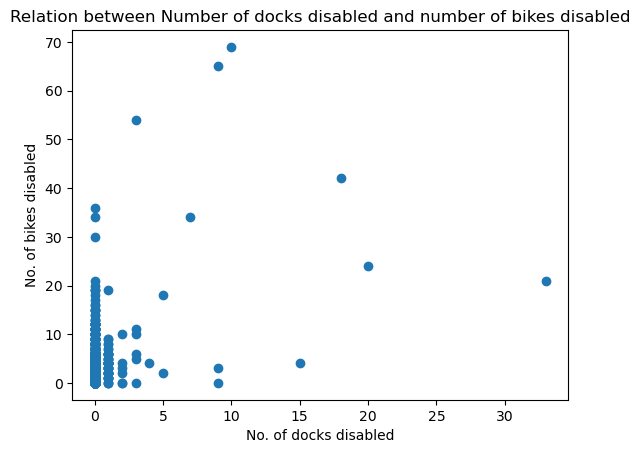

In [214]:
import matplotlib.pyplot as plt

plt.scatter(df_disab['num_docks_disabled'],df_disab['num_bikes_disabled'])
plt.xlabel('No. of docks disabled')
plt.ylabel('No. of bikes disabled')
plt.title('Relation between Number of docks disabled and number of bikes disabled')
plt.show()

This graph shows the relation between the number of docks disabled and the number of bikes disabled. There is a weak to moderate correlation between number of disabled docks and number of disabled bikes

Find the shortest possible route a delivery person can take to complete the journey, minimizing the total distance traveled.

In [215]:
dist_station = df_bike_available[['name','lat','lon']]
station_20 = dist_station.sample(20, random_state=42).reset_index(drop=True)
station_20

,name,lat,lon
0,Madison St & Evergreen Ave,40.691220,-73.916930
1,Corona Ave & 98 St,40.744480,-73.865160
2,W 47 St & 9 Ave,40.761530,-73.990070
3,Amsterdam Ave & W 119 St,40.808625,-73.959621
4,2 Ave & E 122 St,40.800672,-73.934900
5,Parkside Ave & Ocean Ave,40.654850,-73.962170
6,Ave C & E 16 St,40.729848,-73.974552
7,Audubon Ave & Fort George Ave,40.857158,-73.927174
8,Little West St & 1 Pl,40.705693,-74.016777
9,FDR Drive & E 35 St,40.744219,-73.971212


In [216]:
import numpy as np
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*(np.sin(dlon/2)**2)
    return  2*R*np.arcsin(np.sqrt(a))

n = len(station_20)
dist = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i != j:
            dist[i,j] = haversine(
                station_20.loc[i, 'lat'], station_20.loc[i, 'lon'],
                station_20.loc[j, 'lat'], station_20.loc[j, 'lon']
        )

In [217]:
!pip install gurobipy

from gurobipy import Model, GRB, quicksum

m = Model('TSP')

x = {}
for i in range(n):
    for j in range(n):
        if i != j:
            x[i,j] = m.addVar(vtype=GRB.BINARY, name=f"x_{i}_{j}")

u = {i: m.addVar(lb=0, ub=n-1, vtype=GRB.CONTINUOUS, name=f"u_{i}") for i in range(n)}

m.update()
m.setObjective(quicksum(dist[i,j]*x[i,j] for i,j in x), GRB.MINIMIZE)

for i in range(n):
    m.addConstr(quicksum(x[i, j] for j in range(n) if j != i) == 1, name=f"out_{i}")

for j in range(n):
    m.addConstr(quicksum(x[i, j] for i in range(n) if i != j) == 1, name=f"in_{j}")

m.addConstr(u[0] == 0, name="u0")
for i in range(1, n):
    for j in range(1, n):
        if i != j:
            m.addConstr(u[i] - u[j] + n * x[i, j] <= n - 1, name=f"mtz_{i}_{j}")

m.setParam("MIPGap", 0.0001)
m.optimize()

Set parameter MIPGap to value 0.0001
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 383 rows, 400 columns and 1787 nonzeros (Min)
Model fingerprint: 0xfc7c15e4
Model has 380 linear objective coefficients
Variable types: 20 continuous, 380 integer (380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e-01, 3e+01]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 2e+01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.00s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 19 continuous, 380 integer (380 binary)
Found heuristic solution: objective 190.6112942

Root relaxation: objective 5.992997e+01, 52 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    B

In [218]:
solution_edge = []
for i,j in x:
    if x[i,j].x > 0.5:
        solution_edge.append((i,j))
print(solution_edge)

[(0, 14), (1, 12), (2, 13), (3, 7), (4, 3), (5, 19), (6, 9), (7, 16), (8, 18), (9, 2), (10, 17), (11, 5), (12, 0), (13, 4), (14, 11), (15, 6), (16, 10), (17, 1), (18, 15), (19, 8)]


In [219]:
m.ObjVal

73.46384764634095

Output shows the shortest possible route and the distance traveled.